In [6]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd
import csv
import requests, json, csv


def build_URL(search):
    # connect to Geoname API by building URL-encoded GET request
    # API Endpoint: "front door our API server"
    # currently set up to return only 10 search results
    API_ENDPOINT = 'http://api.geonames.org/wikipediaSearchJSON?q=%s&maxRows=10&username=vhebert20' % (search)
    full_url = API_ENDPOINT
    print('URL: ', full_url)
    return full_url

def make_api_request(url):
    # send out the request for information
    response = requests.get(url)
    # check its status to see if all is well
    print('Made request, response status: ', response.status_code)
    # 200 is OK
    if(int(response.status_code) == 200):
        payload_obj = json.loads(response.text)
        return payload_obj
    else:
        return None

def print_to_file(results, file_name):
    # print results to list
    information = results['geonames']
    # establish field names
    fieldnames = ['title', 'feature', 'summary', 'elevation', 'lat', 'lng', 'countryCode', 'wikipediaUrl', 'rank', 'geoNameId', 'thumbnailImg', 'lang']
    with open(file_name, 'w', encoding = 'utf-8') as search_output: # specify encoding due to special characters
        # link field names and assign line end terminator to remove blank lines in csv
        written_file = csv.DictWriter(search_output, fieldnames = fieldnames, lineterminator = '\n')
        # write field names
        written_file.writeheader()
        # pull in information based on field names
        written_file.writerows(information)
    return

def fancy_print(results):
    # iterate over list and print out values of interest
    information = results['geonames']
    for index in range(len(information)):
        if 'elevation' in information[index]:
            print('title: ', information[index]['title'])
            print(information[index]['summary'])
            print('elevation: ', information[index]['elevation'])
            print('lat: ', information[index]['lat'])
            print('long: ', information[index]['lng'])
            print()
        else:
            print('title: ', information[index]['title'])
            print(information[index]['summary'])
            print('lat: ', information[index]['lat'])
            print('long: ', information[index]['lng'])
            print()
    return


thing = input("Please give me a topic of interest: ")
print()
url = build_URL(thing)
print()
returned_info = make_api_request(url)
print()
fancy_print(returned_info)
name_of_file = input("What would you like to name the save file, include .csv? ")
print_to_file(returned_info, name_of_file)
print('\n', "File will be saved in your working directory.", sep = '')


Please give me a topic of interest: python

URL:  http://api.geonames.org/wikipediaSearchJSON?q=python&maxRows=10&username=vhebert20

Made request, response status:  200

title:  Delphi
Delphi (or ;)In English, the name Delphi is pronounced either as or, in a more the Greek-like manner, as . The Greek spelling transliterates as "Delphoi" (with an o); dialectal forms include Belphoi &mdash; Aeolian form &mdash; and Dalphoi &mdash; Phocian form&mdash;, as well as  (...)
elevation:  585
lat:  38.481250548333335
long:  22.499634989722225

title:  Saint-Python
Saint-Python is a commune in the Nord department in northern France.  (...)
elevation:  64
lat:  50.1906
long:  3.4825

title:  Monastir, Tunisia
Monastir also called Mīstīr (Monāstīr / Mīstīr, from the Greek μοναστήριον "Hermit's Cell, monastery"), is a city on the central coast of Tunisia, in the Sahel area, (20 km south of Sousse and 162 km south of Tunis). Traditionally a fishing port, Monastir is now a major tourist resort (...)


In [8]:
# extract title/lat/long from csv for mapping
file_name = input("What is the name of the file you would like to map, include .csv? ")
df = pd.read_csv(file_name, usecols = ['title','lat','lng'])
df 


What is the name of the file you would like to map, include .csv? python.csv


,title,lat,lng
0,Delphi,38.481251,22.499635
1,Saint-Python,50.190600,3.482500
2,"Monastir, Tunisia",35.760000,10.810000
3,Efteling,51.649642,5.043614
4,Limpopo River,-25.166667,33.583333
5,Grünwalder Stadion,48.110950,11.574578
6,Franceville,-1.620700,13.582700
7,Uluru,-25.345100,131.036400
8,Amundsen–Scott South Pole Station,-89.997550,139.272890
9,Torremolinos,36.621786,-4.500272


What would you like to name the saved map, include .pdf? granite.pdf


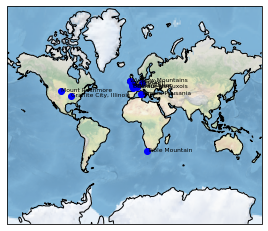

In [3]:
# https://scitools.org.uk/cartopy/docs/latest/matplotlib/intro.html
# plot the points returned from the Geoname search onto a map using cartopy and matplotlib

plt.rc('font', size = 6) # controls default text sizes

ax = plt.axes(projection=ccrs.Mercator()) # assigns projection
ax.coastlines() # adds coastlines
ax.stock_img() # adds the background image

# pull in lat/long for each of the ten points returned from the search
loc0_lon, loc0_lat = df.at[0,'lng'], df.at[0,'lat']
loc1_lon, loc1_lat = df.at[1,'lng'], df.at[1,'lat']
loc2_lon, loc2_lat = df.at[2,'lng'], df.at[2,'lat']
loc3_lon, loc3_lat = df.at[3,'lng'], df.at[3,'lat']
loc4_lon, loc4_lat = df.at[4,'lng'], df.at[4,'lat']
loc5_lon, loc5_lat = df.at[5,'lng'], df.at[5,'lat']
loc6_lon, loc6_lat = df.at[6,'lng'], df.at[6,'lat']
loc7_lon, loc7_lat = df.at[7,'lng'], df.at[7,'lat']
loc8_lon, loc8_lat = df.at[8,'lng'], df.at[8,'lat']
loc9_lon, loc9_lat = df.at[9,'lng'], df.at[9,'lat']

# plot the points
plt.plot([loc0_lon, loc1_lon, loc2_lon, loc3_lon, loc4_lon, loc5_lon, loc6_lon, loc7_lon, loc8_lon, loc9_lon], 
         [loc0_lat, loc1_lat, loc2_lat, loc3_lat, loc4_lat, loc5_lat, loc6_lat, loc7_lat, loc8_lat, loc9_lat],
         color='blue', linewidth=0, marker='o',
         transform=ccrs.Geodetic(),)

# plot the titles/names
plt.text(loc0_lon, loc0_lat, df.at[0,'title'],
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.text(loc1_lon, loc1_lat, df.at[1,'title'],
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.text(loc2_lon, loc2_lat, df.at[2,'title'],
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.text(loc3_lon, loc3_lat, df.at[3,'title'],
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.text(loc4_lon, loc4_lat, df.at[4,'title'],
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.text(loc5_lon, loc5_lat, df.at[5,'title'],
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.text(loc6_lon, loc6_lat, df.at[6,'title'],
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.text(loc7_lon, loc7_lat, df.at[7,'title'],
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.text(loc8_lon, loc8_lat, df.at[8,'title'],
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.text(loc9_lon, loc9_lat, df.at[9,'title'],
         horizontalalignment='left',
         transform=ccrs.Geodetic())

# save the plot by calling plt.savefig() BEFORE plt.show()
name_of_map = input("What would you like to name the saved map, include .pdf? ")
plt.savefig(name_of_map)

plt.show()